<a href="https://colab.research.google.com/github/esteban-miller/7.AI-Fundamentals-Machine-Learning/blob/main/COPIA_Trabajo_final_ML_kaggle_bank_campaing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>
*
<center> <h3> Module 7: IA Fundamentals: Machine Learning </h3> </center>
<center> <h4> Classification models </h4> </center>
*

**Integrantes del grupo:**


*   Esteban Miller
*   Sergio Martín




In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


# Tree Visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

# Save model / deployment
import pickle
import sys


from scipy.stats import chi2_contingency

## 1.- Load Data

El dataset consiste en un conjunto de 19 parámetros calculados a partir registros de campañas pasadas asociadas al cliente. Estas variables, recogen distintas características del cliente, desde su edad, estado civil, educación así como información asociada a la cuenta.


**Descripción del dataset**

Este problema de clasificación binaria tiene como objetivo predecir si el cliente suscribirá un depósito bancario a plazo (variable **output**).

Variables de entrada:

#### Bank client data:
- **age** (numeric)

- **job**: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

- **marital_status** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

- **education_level** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

- **is_default**: has credit in default? (categorical: "no","yes","unknown")

- **housing_type**: has housing loan? (categorical: "no","yes","unknown")

- **loan:** has personal loan? (categorical: "no","yes","unknown")

#### Related with the last contact of the current campaign:

- **contact:** contact communication type (categorical: "cellular","telephone")

- **month:** last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

- **day_of_week:** last contact day of the week (categorical: "mon","tue","wed","thu","fri")

##### Other attributes:
- **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)

- **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- **previous:** number of contacts performed before this campaign and for this client (numeric)

- **poutcome:** outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")

##### Social and economic context attributes
- **emp_var_rate:** employment variation rate - quarterly indicator (numeric)

- **cons_price_index:** consumer price index - monthly indicator (numeric)

- **cons_conf_index**: consumer confidence index - monthly indicator (numeric)

- **euribor_3m:** euribor 3 month rate - daily indicator (numeric)

- **n_employed**: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):
- **output**: - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
Local = True

In [ ]:
if Local == True:
    !gdown https://drive.google.com/uc?id=1X7AIcMKUOA7-nOUptjo2Cx6lL4hIIHzQ
    # https://drive.google.com/file/d/1nxD5meFAO-NvDhuteBJ7KgifG10Bfsoa/view?usp=sharing
    train_df = pd.read_csv('train.csv').drop('id', axis=1)
else:
    train_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/train.csv").drop('id', axis=1)

Downloading...
From: https://drive.google.com/uc?id=1X7AIcMKUOA7-nOUptjo2Cx6lL4hIIHzQ
To: /content/train.csv
100% 3.98M/3.98M [00:00<00:00, 26.7MB/s]


In [ ]:
train_df = pd.read_csv('train.csv').drop('id', axis=1)

In [ ]:
train_df.head()

,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
0,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
train_df.pdays.unique()

array([999,   6,   4,   5,   1,   3,   0,  10,   7,   8,  11,   2,   9,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [ ]:
train_df.shape

(33108, 20)

## 2.- Exploratory Data Analysis (Data Understanding / Descriptive Analysis)

In [ ]:
##------------------------
# Analyze the data


In [ ]:
train_df.shape

(33108, 20)

In [ ]:
# Vamos a verificar cuántos na/nulls tenemos en el Dataset

train_df.isna().mean().sort_values(ascending = False)

In [ ]:
# Vamos a analizar la variable job

(train_df.job.value_counts(dropna = False) / len(train_df)).round(2)

,count
job,
admin.,0.25
blue-collar,0.22
technician,0.16
services,0.10
management,0.07
retired,0.04
entrepreneur,0.04
self-employed,0.04
housemaid,0.03


In [ ]:
# train_df['output'] = train_df['output'].replace({0: 'Apto', 1: 'No Apto'})

In [ ]:
train_df.marital_status.unique()

In [ ]:
train_df.marital_status.value_counts(dropna = False)

In [ ]:
# Vamos a analizar la variable marital_status GENERAL
(train_df.marital_status.value_counts(dropna = False) / len(train_df)).round(3)

,count
marital_status,
married,0.606
single,0.280
divorced,0.112
unknown,0.002


In [ ]:
# Vamos a analizar la variable emp_var_rate vs output

print("Proporción de output por emp_var_rate:")
edu_output = pd.crosstab(train_df['emp_var_rate'], train_df['output'], normalize='index').round(2)
print(edu_output)

Proporción de output por emp_var_rate:
output           0     1
emp_var_rate            
-3.4          0.57  0.43
-3.0          0.49  0.51
-2.9          0.64  0.36
-1.8          0.84  0.16
-1.7          0.48  0.52
-1.1          0.52  0.48
-0.2          0.88  0.12
-0.1          0.94  0.06
 1.1          0.97  0.03
 1.4          0.95  0.05


In [ ]:
# Vamos a analizar la variable marital_status vs output

print("Proporción de output por marital_status:")
edu_output = pd.crosstab(train_df['marital_status'], train_df['output'], normalize='index').round(2)
print(edu_output)

In [ ]:
# Vamos a analizar la variable education_level

train_df.education_level.value_counts()

In [ ]:
train_df.education_level.unique()

In [ ]:
# Vamos a analizar la variable nivel educativo vs output

print("Proporción de output por nivel educativo:")
edu_output = pd.crosstab(train_df['education_level'], train_df['output'], normalize='index').round(2)
print(edu_output)


Proporción de output por nivel educativo:
output                  0     1
education_level                
basic.4y             0.90  0.10
basic.6y             0.92  0.08
basic.9y             0.92  0.08
high.school          0.89  0.11
illiterate           0.79  0.21
professional.course  0.89  0.11
university.degree    0.86  0.14
unknown              0.85  0.15


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'university.degree'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'professional.course'),
  Text(4, 0, 'basic.4y'),
  Text(5, 0, 'basic.6y'),
  Text(6, 0, 'unknown'),
  Text(7, 0, 'illiterate')])

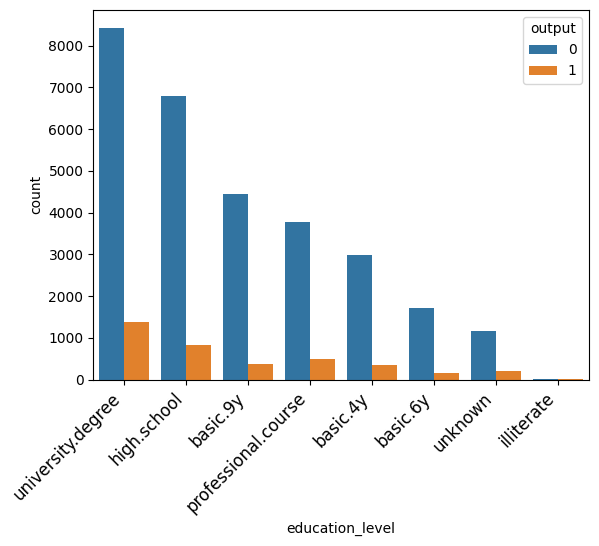

In [ ]:
## Barplots de education_level

sns.countplot(data = train_df, x = 'education_level', hue = 'output',
              order=train_df['education_level'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=12)

In [ ]:
# Categorzamos la variable emp_var_rate para visualizarla de forma mas clara
train_df['emp_var_rate_clas'] = pd.cut(train_df['emp_var_rate'],
                                                  bins = sorted([train_transformed['emp_var_rate'].min(), 1.5, 2.5, train_transformed['emp_var_rate'].max()]),
                                                  labels=['malo', 'regular', 'bueno'],
                                                  right=False, include_lowest=True, duplicates='drop')


NameError: name 'train_transformed' is not defined

<Axes: xlabel='emp_var_rate', ylabel='count'>

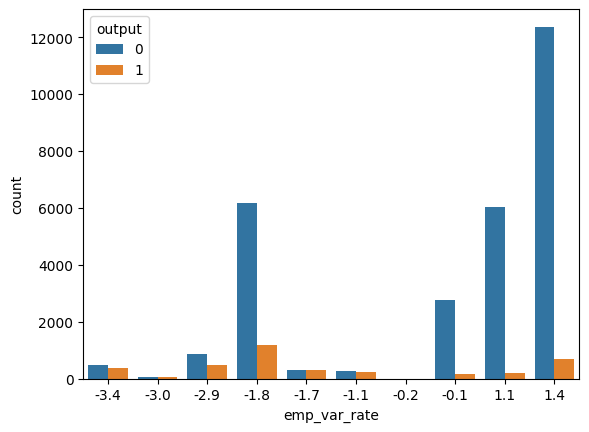

In [ ]:
## Barplots de emp_var_rate

sns.countplot(data = train_df, x = 'emp_var_rate', hue = 'output')

In [ ]:
# Vamos a analizar la variable job vs output
print("Proporción de output por tipo de job:")
job_output = pd.crosstab(train_df['job'], train_df['output'], normalize='index').round(2)
print(job_output)

job_output_sorted = job_output.sort_values(by=job_output.columns.tolist(), ascending=True)

job_output_sorted.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Paired')
plt.title("Proporción de respuesta 'output' por tipo de trabajo")
plt.xlabel("Tipo de trabajo")
plt.ylabel("Proporción")
plt.xticks(rotation=45)
plt.legend(title='Output', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
train_df.info()

### 2.1.- Descriptive Analysis

In [ ]:
# =====================================
# 4. Visualización: Distribución de variables numéricas
# =====================================
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

train_df[numeric_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribuciones de Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# =====================================
# 5. Visualización: Variables categóricas
# =====================================
categorical_cols = train_df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Frecuencia de: {col}")
    plt.tight_layout()
    plt.show()


In [ ]:
#Analizamos los datos para poder usar posteriormente el metodo K-nn

train_df.describe()

## 3.- Correlations

In [ ]:
## Cramer's V correlation

def cramers_V(var1,var2) :
  confusion_matrix = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum()
  phi2 = chi2 / n
  r, k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

  #stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  #obs = np.sum(crosstab) # Number of observations
  #mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  #return (stat/(obs*mini))

def cramers_correlation_matrix(data_encoded):
  rows= []
  for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
      cramers = cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
      col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
    rows.append(col)

  cramers_results = np.array(rows)

  df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

  return df

def heatmap_correlation(df):

  mask = np.zeros_like(df, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, cmap="viridis")

  plt.show()

In [ ]:
corr = cramers_correlation_matrix(train_df)

In [ ]:
corr

,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
age,1.00,0.25,0.28,0.14,0.16,0.02,0.02,0.12,0.14,0.04,0.00,0.07,0.11,0.14,0.15,0.13,0.13,0.18,0.15,0.20
job,0.25,1.00,0.18,0.36,0.15,0.01,0.01,0.13,0.11,0.02,0.00,0.05,0.05,0.10,0.11,0.13,0.13,0.16,0.11,0.15
marital_status,0.28,0.18,1.00,0.12,0.09,0.01,0.00,0.07,0.05,0.01,0.01,0.03,0.03,0.04,0.08,0.09,0.09,0.12,0.08,0.05
education_level,0.14,0.36,0.12,1.00,0.17,0.01,0.00,0.12,0.09,0.02,0.00,0.02,0.02,0.04,0.07,0.11,0.11,0.13,0.08,0.07
is_default,0.16,0.15,0.09,0.17,1.00,0.01,0.00,0.13,0.11,0.01,0.01,0.05,0.07,0.08,0.16,0.17,0.17,0.15,0.17,0.10
housing_type,0.02,0.01,0.01,0.01,0.01,1.00,0.71,0.08,0.05,0.01,0.02,0.01,0.02,0.02,0.06,0.08,0.08,0.08,0.06,0.01
loan,0.02,0.01,0.00,0.00,0.00,0.71,1.00,0.02,0.02,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.02,0.05,0.01,0.00
contact,0.12,0.13,0.07,0.12,0.13,0.08,0.02,1.00,0.61,0.05,0.08,0.12,0.24,0.24,0.67,0.86,0.86,0.80,0.67,0.15
month,0.14,0.11,0.05,0.09,0.11,0.05,0.02,0.61,1.00,0.06,0.06,0.11,0.13,0.24,0.65,1.00,1.00,0.89,0.67,0.27
day_of_week,0.04,0.02,0.01,0.02,0.01,0.01,0.00,0.05,0.06,1.00,0.05,0.02,0.00,0.02,0.05,0.08,0.08,0.73,0.05,0.02


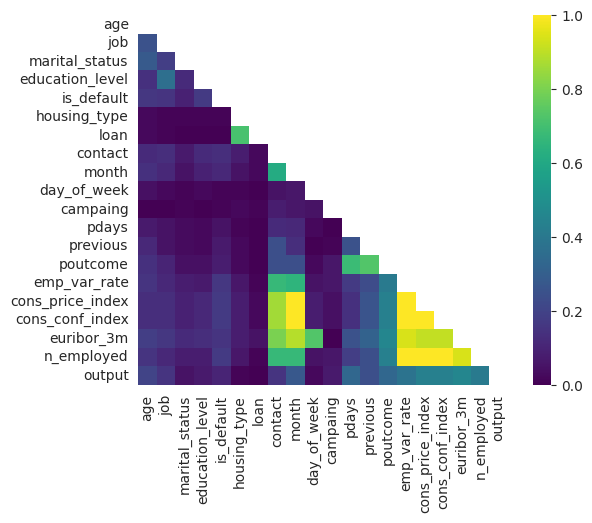

In [ ]:
heatmap_correlation(corr)

De este modo vemos la correlacion de las variables categoricas con  Cramér’s V

In [ ]:
train_df.corr(numeric_only = True)

,age,campaing,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
age,1.000000,0.001741,-0.033185,0.027960,0.001312,0.000850,0.129133,0.012724,-0.015338,0.026472
campaing,0.001741,1.000000,0.051973,-0.076775,0.150669,0.129619,-0.013590,0.134940,0.143321,-0.067292
pdays,-0.033185,0.051973,1.000000,-0.590891,0.273400,0.077120,-0.089539,0.300798,0.377213,-0.328495
previous,0.027960,-0.076775,-0.590891,1.000000,-0.420349,-0.200746,-0.050088,-0.455232,-0.503215,0.232538
emp_var_rate,0.001312,0.150669,0.273400,-0.420349,1.000000,0.775889,0.191731,0.972142,0.906938,-0.301702
cons_price_index,0.000850,0.129619,0.077120,-0.200746,0.775889,1.000000,0.054922,0.688875,0.523109,-0.138786
cons_conf_index,0.129133,-0.013590,-0.089539,-0.050088,0.191731,0.054922,1.000000,0.273746,0.097221,0.057704
euribor_3m,0.012724,0.134940,0.300798,-0.455232,0.972142,0.688875,0.273746,1.000000,0.945264,-0.311144
n_employed,-0.015338,0.143321,0.377213,-0.503215,0.906938,0.523109,0.097221,0.945264,1.000000,-0.357851
output,0.026472,-0.067292,-0.328495,0.232538,-0.301702,-0.138786,0.057704,-0.311144,-0.357851,1.000000


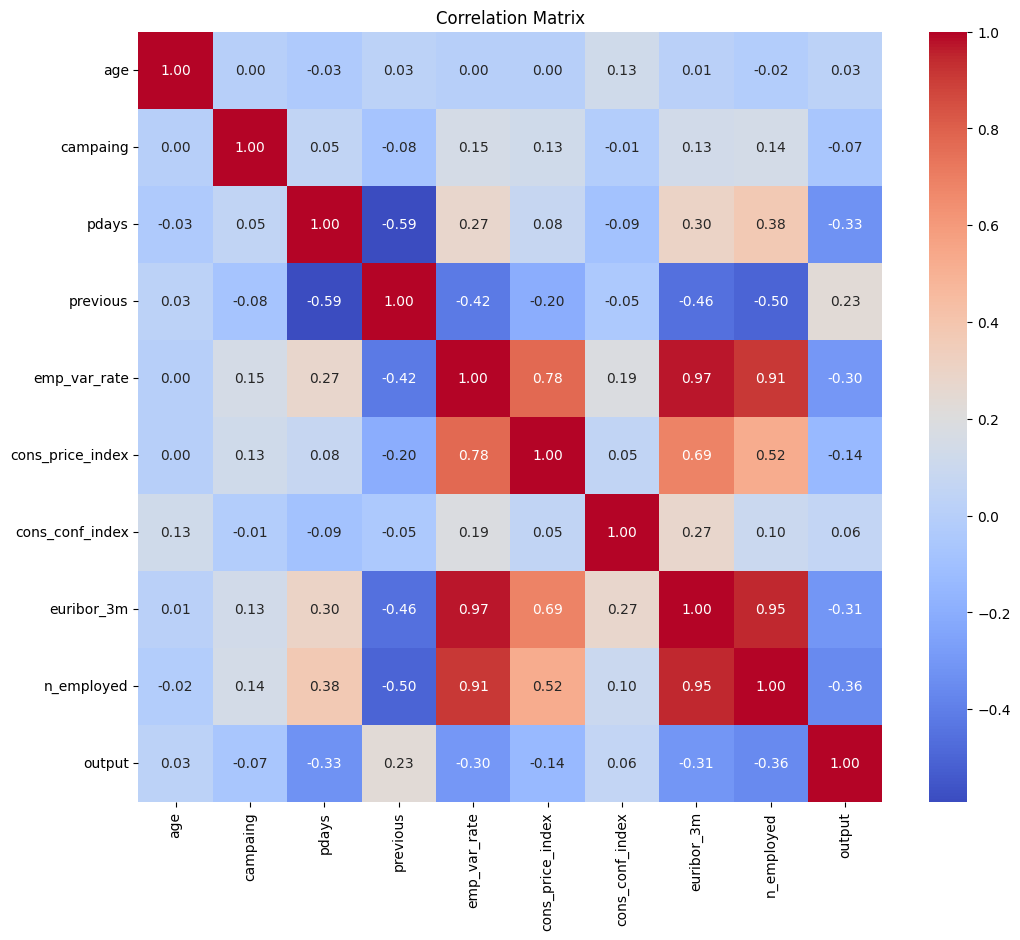

In [ ]:
import matplotlib.pyplot as plt
# Create a correlation matrix
corr_matrix = train_df.corr(numeric_only=True)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


En cambio, en este otro enfoque analizamos la relación entre las variables numéricas utilizando el coeficiente de Pearson, y representamos los resultados en un heatmap para facilitar su interpretación de forma más ágil y visual.

Observamos que las variables n_employed, euribor_3m y emp_var_rate presentan una correlación altísima entre sí, por lo que podemos eliminar dos de ellas y quedarnos solo con una. En este caso, optamos por conservar euribor_3m.



## 4. - Feature Engineering
Apply here all the transformations you consider necessary for training a model.

In [ ]:
train_transformed = train_df[['age','campaing','pdays',"marital_status",
                              'previous','emp_var_rate', 'cons_price_index',
                              'cons_conf_index',"education_level", 'euribor_3m', 'n_employed',
                              'output']]

In [ ]:
train_transformed.head()

,age,campaing,pdays,marital_status,previous,emp_var_rate,cons_price_index,cons_conf_index,education_level,euribor_3m,n_employed,output
0,57,1,999,married,0,1.1,93.994,-36.4,high.school,4.857,5191.0,0
1,37,1,999,married,0,1.1,93.994,-36.4,high.school,4.857,5191.0,0
2,40,1,999,married,0,1.1,93.994,-36.4,basic.6y,4.857,5191.0,0
3,45,1,999,married,0,1.1,93.994,-36.4,basic.9y,4.857,5191.0,0
4,59,1,999,married,0,1.1,93.994,-36.4,professional.course,4.857,5191.0,0


Vamos a aplicar One-hot encouding a la variable marital_status ya que o tiene un orden logico pero queremos que el modelo lo interprete mejor.

In [ ]:
# Aplicando One-hot a las variables marital_status
train_transformed = pd.get_dummies(train_df, columns=['marital_status'])

Aplicamos un Label encoding a la variable nivel educativo y previamente imputamos al valor Unknown con la moda, debido a su pequeña representacion en los datos. De este modo el modelo no lo tratara como un grupo mas, lo cual podria dar resultados erroneos


In [ ]:
train_df.education_level.unique()

array(['high.school', 'basic.6y', 'basic.9y', 'professional.course',
       'unknown', 'basic.4y', 'university.degree', 'illiterate'],
      dtype=object)

In [ ]:
train_transformed.education_level.unique()

array(['high.school', 'basic.6y', 'basic.9y', 'professional.course',
       'unknown', 'basic.4y', 'university.degree', 'illiterate'],
      dtype=object)

In [ ]:
# Imputamos el valor "unknown" por la moda y probamos el modelo

moda = train_transformed['education_level'].mode()[0]
train_transformed['education_level'] = train_transformed['education_level'].replace('unknown', moda)


In [ ]:
# Aplicamos un Label encoding a la variable education_level ya que tiene un orden y de este modo el modelo lo interpretara como tal
from sklearn.preprocessing import OrdinalEncoder

orden = [['illiterate', 'basic.4y', 'basic.6y', 'basic.9y',"high.school", 'professional.course', 'university.degree']]

ordinal_encoder = OrdinalEncoder(categories=orden)
train_transformed[['education_level']] = ordinal_encoder.fit_transform(train_transformed[['education_level']])

In [ ]:
# FUNCION PARA TRANFORMAR LOS DATOS

def data_feature(train_df, ):

  # Selección de las variables en funcion de si uso el output o no, para la funcion final valid

  if 'output' in train_df.columns:
      train_transformed = train_df[['age','campaing','pdays', 'marital_status', 'previous','emp_var_rate', 'cons_price_index',
                                  'cons_conf_index',"education_level", 'euribor_3m', 'n_employed', 'output']]

  else:  # Si la variable de salida 'output', no esta no la incluye
      train_transformed = train_df[['age','campaing','pdays', 'marital_status', 'previous','emp_var_rate', 'cons_price_index',
                                  'cons_conf_index',"education_level", 'euribor_3m', 'n_employed']]

  #Trasnformamos la varibal education_level
  # Imputamos el valor "unknown" por la moda y probamos el modelo

  moda = train_transformed['education_level'].mode()[0]
  train_transformed['education_level'] = train_transformed['education_level'].replace('unknown', moda)

  # Aplicamos un Label encoding a la variable education_level ya que tiene un orden y de este modo el modelo lo interpretara como tal
  from sklearn.preprocessing import OrdinalEncoder

  orden = [['illiterate', 'basic.4y', 'basic.6y', 'basic.9y',"high.school", 'professional.course', 'university.degree']]
  ordinal_encoder = OrdinalEncoder(categories=orden)
  train_transformed[['education_level']] = ordinal_encoder.fit_transform(train_transformed[['education_level']])

  # Aplicando One-hot a las variables marital_status
  train_transformed = pd.get_dummies(train_transformed, columns=['marital_status'])


  return train_transformed



In [ ]:
train_transformed = data_feature(train_df)

<ipython-input-9-45d4235f8754>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_transformed['education_level'] = train_transformed['education_level'].replace('unknown', moda)
<ipython-input-9-45d4235f8754>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_transformed[['education_level']] = ordinal_encoder.fit_transform(train_transformed[['education_level']])


In [ ]:
corr = cramers_correlation_matrix(train_transformed)

In [ ]:
train_df


,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,...,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output,age_normalized,contacted
0,57,services,married,4.0,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.493827,0
1,37,services,married,4.0,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.246914,0
2,40,admin.,married,2.0,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.283951,0
3,45,services,married,3.0,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.345679,0
4,59,admin.,married,5.0,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.518519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33103,37,admin.,married,6.0,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0.246914,0
33104,29,unemployed,single,1.0,no,yes,no,cellular,nov,fri,...,1,success,-1.1,94.767,-50.8,1.028,4963.6,0,0.148148,1
33105,73,retired,married,5.0,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0.691358,0
33106,46,blue-collar,married,5.0,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0.358025,0


In [ ]:
train_df.columns

Index(['age', 'job', 'marital_status', 'education_level', 'is_default',
       'housing_type', 'loan', 'contact', 'month', 'day_of_week', 'campaing',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index',
       'cons_conf_index', 'euribor_3m', 'n_employed', 'output'],
      dtype='object')

In [ ]:
# FUNCION PARA TRANFORMAR LOS DATOS PARA RANDOM FOREST

def data_feature_rf(train_df, ):

  # Selección de las variables en funcion de si uso el output o no, para la funcion final valid

  if 'output' in train_df.columns:
      train_transformed = train_df [['age',  'marital_status', 'education_level', 'campaing',
       'pdays', 'previous', 'emp_var_rate','poutcome', 'cons_price_index',
       'cons_conf_index', 'euribor_3m', 'n_employed', 'output']]

  else:  # Si la variable de salida 'output', no esta no la incluye
      train_transformed = train_df [['age', 'marital_status', 'education_level', 'campaing',
       'pdays', 'previous', 'emp_var_rate','poutcome', 'cons_price_index',
       'cons_conf_index', 'euribor_3m', 'n_employed']]

  #TRASFORMACIONES A VARIABLES NUMERICAS

  #Categorizamos la variable edad y la normalizamos
  #from sklearn.preprocessing import MinMaxScaler

  #bins = [0, 30, 50, 100]
  #labels = ['Joven', 'Adulto', 'Senior']
  #train_transformed['age_category'] = pd.cut(train_transformed['age'], bins=bins, labels=labels, right=True)

  #Normalizamos con MinMaxScaler
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  train_transformed['age_normalized'] = scaler.fit_transform(train_transformed[['age']])


  #Trasnformamos la variable education_level

  # Imputamos el valor "unknown" por la moda y probamos el modelo
  moda = train_transformed['education_level'].mode()[0]
  train_transformed['education_level'] = train_transformed['education_level'].replace('unknown', moda)

  # Aplicamos un Label encoding a la variable education_level ya que tiene un orden y de este modo el modelo lo interpretara como tal
  from sklearn.preprocessing import OrdinalEncoder

  orden = [['illiterate', 'basic.4y', 'basic.6y', 'basic.9y',"high.school", 'professional.course', 'university.degree']]
  ordinal_encoder = OrdinalEncoder(categories=orden)
  train_transformed[['education_level']] = ordinal_encoder.fit_transform(train_transformed[['education_level']])

  #Trasnformamos la varibal pdays

  # Reemplazar 999 con -1 para indicar "no contactado"
  train_transformed['pdays'] = train_transformed['pdays'].replace(999, -1)

  # Crear una nueva variable binaria 'contacted'
  train_transformed['contacted'] = train_transformed['pdays'].apply(lambda x: 1 if x != -1 else 0)

  # Opcional: Binning de la variable pdays
  #bins = [-1, 0, 10, 20, float('inf')]
  #labels = ['No contactado', 'Recientemente contactado', 'Contactado hace tiempo', 'Contactado muy hace tiempo']
  #train_transformed['pdays_binned'] = pd.cut(train_transformed['pdays'], bins=bins, labels=labels)

  #Trasnformamos la varibal poutcome
  train_transformed = pd.get_dummies(train_transformed, columns=['poutcome'], prefix='poutcome')


  #TRASFORMACIONES A VARIABLES CATEGORICAS

  # Aplicando One-hot a las variables marital_status
  train_transformed = pd.get_dummies(train_transformed, columns=['marital_status'])

  return train_transformed



In [ ]:
train_transformed_rf = data_feature_rf(train_df)

<ipython-input-7-3449f5176864>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_transformed['age_normalized'] = scaler.fit_transform(train_transformed[['age']])
<ipython-input-7-3449f5176864>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_transformed['education_level'] = train_transformed['education_level'].replace('unknown', moda)
<ipython-input-7-3449f5176864>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
corr = cramers_correlation_matrix(train_transformed_rf )

In [ ]:
correlation_matrix = train_transformed.corr(numeric_only=True)
output_correlation = correlation_matrix['output'].drop('output')
output_correlation


,output
age,0.026472
campaing,-0.067292
pdays,-0.328495
previous,0.232538
emp_var_rate,-0.301702
cons_price_index,-0.138786
cons_conf_index,0.057704
education_level,0.059118
euribor_3m,-0.311144
n_employed,-0.357851


## 5. - Data Model

In [ ]:
##----------------------------
# Train & Test split

X = train_transformed.drop('output',axis=1)
y = train_transformed['output']

seed = 2022
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = seed , test_size = test_size)


In [ ]:
##----------------------------
# Train & Test split para random forest

X = train_transformed_rf.drop('output', axis=1)
y = train_transformed_rf['output']

seed = 2022
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = seed , test_size = test_size)



In [ ]:
y_train.value_counts()

,count
output,
0,23458
1,3028


In [ ]:
X.columns

Index(['age', 'education_level', 'campaing', 'pdays', 'previous',
       'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'euribor_3m',
       'n_employed', 'age_normalized', 'contacted', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'marital_status_divorced',
       'marital_status_married', 'marital_status_single',
       'marital_status_unknown'],
      dtype='object')

In [ ]:
len(X_train), len(X_test),

(26486, 6622)

### 5.0 Training a Logistic Regression Model

### 5.1 Logistic Regression

In [ ]:
#----------------------------------------
# Train a model
from sklearn.linear_model import LogisticRegression

model_rl_1 =  LogisticRegression(solver = 'liblinear', random_state= 1234)
model_rl_1.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
#-----------------------------------------
# Predict con el dataset de test

y_pred = model_rl_1.predict(X_test)
y_pred_prb = model_rl_1.predict_proba(X_test)

In [ ]:
# Valores en TRAIN
model_rl_1.predict(X_train)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
##----------------------------------------
# Compute metrics Function

def compute_metrics(model, X_train, y_train, X_test, y_test, trh = 0.5):
  y_pred_proba_train = model.predict_proba(X_train)[:, 1]
  y_pred_proba_test = model.predict_proba(X_test)[:, 1]
  y_pred = (model.predict_proba(X_test)[:,1] >= trh).astype(bool)

  [fpr_train, tpr_train, thr_train] = metrics.roc_curve(y_train, y_pred_proba_train)
  [fpr_test, tpr_test, thr_test] = metrics.roc_curve(y_test, y_pred_proba_test)


  mcm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])
  tp = mcm[0, 0]
  tn = mcm[1, 1]
  fn = mcm[1, 0]
  fp = mcm[0, 1]
  #|TP FP|
  #|FN TN|

  Specificity = tn / (tn + fp)
  Sensitivity = tp/ (tp + fn)
  #|TP FP|
  #|FN TN|

  #create ROC curve
  plt.plot(fpr_train,tpr_train, '-r')
  plt.plot(fpr_test,tpr_test, '-b')
  plt.plot([0, 1], ls="--")
  plt.legend(['train','test'])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  print('Train/Test split results:')
  print(model.__class__.__name__+" accuracy is %2.3f" % metrics.accuracy_score(y_test, y_pred))
  print(model.__class__.__name__+" auc in test is %2.3f" % metrics.auc(fpr_test, tpr_test))
  print(model.__class__.__name__+" auc in train is %2.3f" % metrics.auc(fpr_train, tpr_train))
  print(model.__class__.__name__+" Sensitivity is %2.3f" % metrics.recall_score(y_test, y_pred))
  print(model.__class__.__name__+" Sensitivity 2 is %2.3f" % Sensitivity)
  print(model.__class__.__name__+" Specificity is %2.3f" % Specificity)
  print(model.__class__.__name__+" F1 is %2.3f" % metrics.f1_score(y_test, y_pred, labels=[1,0]))
  print(mcm)

In [ ]:
compute_metrics(model_rl_1, X_train, y_train, X_test, y_test)

NameError: name 'model_rl_1' is not defined

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


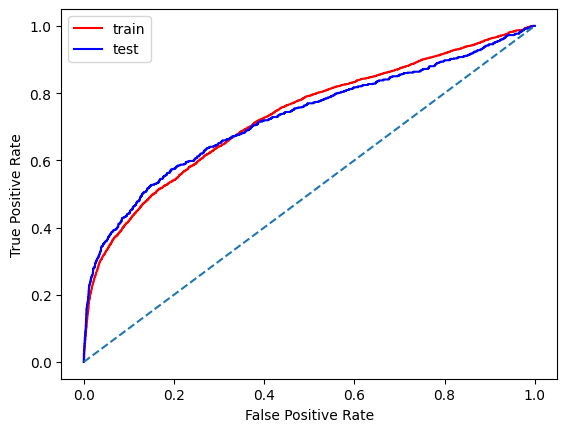

Train/Test split results:
LogisticRegression accuracy is 0.903
LogisticRegression auc in test is 0.728
LogisticRegression auc in train is 0.732
LogisticRegression Sensitivity is 0.232
LogisticRegression Sensitivity 2 is 0.683
LogisticRegression Specificity is 0.912
LogisticRegression F1 is 0.346
[[ 170  564]
 [  79 5809]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5888
           1       0.68      0.23      0.35       734

    accuracy                           0.90      6622
   macro avg       0.80      0.61      0.65      6622
weighted avg       0.89      0.90      0.88      6622



In [ ]:
#----------------------------------------
# Train a model: MODEL 2

model_rl_2 =  LogisticRegression(solver = 'saga',
                                 random_state= 1234,
                                 penalty= "elasticnet",
                                 C = 0.5,
                                 l1_ratio = 0.5)
model_rl_2.fit(X_train, y_train)

# Predict con el dataset de test

y_pred = model_rl_2.predict(X_test)
y_pred_prb = model_rl_2.predict_proba(X_test)

# Check metrics
compute_metrics(model_rl_2, X_train, y_train, X_test, y_test, trh = 0.3)


### 5.2 The Bayes Classifier (Naïve Bayes)

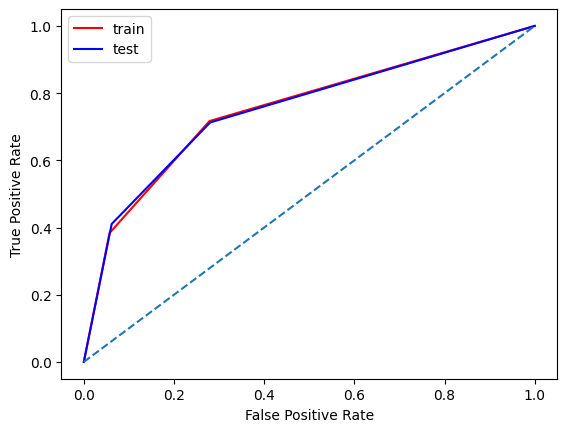

Train/Test split results:
CategoricalNB accuracy is 0.720
CategoricalNB auc in test is 0.752
CategoricalNB auc in train is 0.752
CategoricalNB Sensitivity is 0.711
CategoricalNB Sensitivity 2 is 0.241
CategoricalNB Specificity is 0.952
CategoricalNB F1 is 0.360
[[ 522  212]
 [1644 4244]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      5888
           1       0.24      0.71      0.36       734

    accuracy                           0.72      6622
   macro avg       0.60      0.72      0.59      6622
weighted avg       0.87      0.72      0.77      6622



In [ ]:
#Entrenamos un modelo de clasificacion de tipo NAIVE BAYES

from sklearn.naive_bayes import CategoricalNB

new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:2].index)
#new_columns= new_columns.drop('age_group', axis=1)


# Define model
model_nb_1 = CategoricalNB(alpha=0.5, fit_prior=False)

# Train model
model_nb_1 .fit(X_train[new_columns], y_train)

# Predict
y_pred = model_nb_1.predict(X_test[new_columns])


# Eval model
compute_metrics(model_nb_1, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)

<ipython-input-57-90d39fc6dbf6>:25: RuntimeWarning: invalid value encountered in scalar divide
  Sensitivity = tp/ (tp + fn)


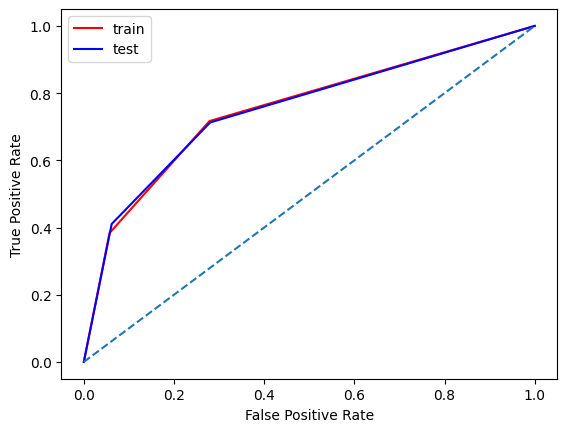

Train/Test split results:
CategoricalNB accuracy is 0.889
CategoricalNB auc in test is 0.752
CategoricalNB auc in train is 0.752
CategoricalNB Sensitivity is 0.000
CategoricalNB Sensitivity 2 is nan
CategoricalNB Specificity is 0.889
CategoricalNB F1 is 0.000
[[   0  734]
 [   0 5888]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5888
           1       0.00      0.00      0.00       734

    accuracy                           0.89      6622
   macro avg       0.44      0.50      0.47      6622
weighted avg       0.79      0.89      0.84      6622



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#----------------------------------------
# Entrenamos otro modelo de clasificacion de tipo NAIVE BAYES

from sklearn.naive_bayes import CategoricalNB

#Usamos n variables con mas relacion con la variable de salida
new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:2].index)


# Define model
model_nb_2 = CategoricalNB()

# Train model
model_nb_2 .fit(X_train[new_columns], y_train)

# Predict
y_pred = model_nb_2.predict(X_test[new_columns])


# Eval model
compute_metrics(model_nb_2, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)



### 5.3 k-Nearest Neighbors (KNN)

Es importante normalizar las magnitudes para tener todas las medidas en un mismo rango.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_transformed.drop('output', axis = 1))
scaled_features = scaler.transform(train_transformed.drop('output', axis = 1))
df_feat = pd.DataFrame(scaled_features, columns = train_transformed.columns[:-1])
type(scaled_features)

numpy.ndarray

In [ ]:
##-----------------------------
# Check the standarization

<Axes: >

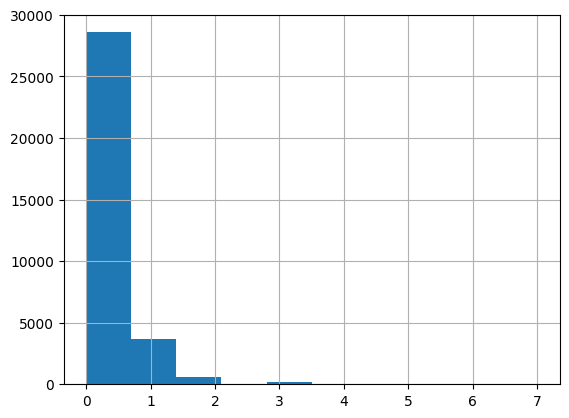

In [ ]:
train_transformed.previous.hist()

In [ ]:
df_feat.describe()

,age,campaing,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,education_level,euribor_3m,n_employed,output,marital_status_divorced,marital_status_married,marital_status_single
count,3.310800e+04,3.310800e+04,3.310800e+04,3.310800e+04,3.310800e+04,3.310800e+04,3.310800e+04,3.310800e+04,3.310800e+04,3.310800e+04,3.310800e+04,3.310800e+04,3.310800e+04,3.310800e+04
mean,1.373527e-17,1.098822e-16,2.060291e-17,2.060291e-17,-4.635654e-17,2.884407e-16,1.047314e-16,9.700535e-17,-1.236174e-16,9.487638e-15,-2.403672e-17,5.150727e-18,1.158913e-16,-1.582775e-18
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.214470e+00,-5.664030e-01,-5.090707e+00,-3.499986e-01,-2.211636e+00,-2.369577e+00,-2.227091e+00,-2.578911e+00,-1.720203e+00,-2.811780e+00,-3.557302e-01,-1.240390e+00,-6.229911e-01,-4.469293e-02
25%,-7.726872e-01,-5.664030e-01,1.976687e-01,-3.499986e-01,-1.194748e+00,-8.623591e-01,-4.771848e-01,-7.550553e-01,-1.311138e+00,-9.383714e-01,-3.557302e-01,-1.240390e+00,-6.229911e-01,-4.469293e-02
50%,-1.959741e-01,-2.061388e-01,1.976687e-01,-3.499986e-01,6.483608e-01,2.999579e-01,-2.827507e-01,-1.471035e-01,7.128689e-01,3.322284e-01,-3.557302e-01,8.061980e-01,-6.229911e-01,-4.469293e-02
75%,6.690956e-01,1.541253e-01,1.976687e-01,-3.499986e-01,8.390273e-01,7.224619e-01,8.838538e-01,1.068800e+00,7.727882e-01,8.451691e-01,-3.557302e-01,8.061980e-01,1.605159e+00,-4.469293e-02
max,5.571157e+00,1.924813e+01,1.976687e-01,1.382339e+01,8.390273e-01,2.055505e+00,2.936214e+00,1.068800e+00,8.211846e-01,8.451691e-01,2.811120e+00,8.061980e-01,1.605159e+00,2.237490e+01


<Axes: >

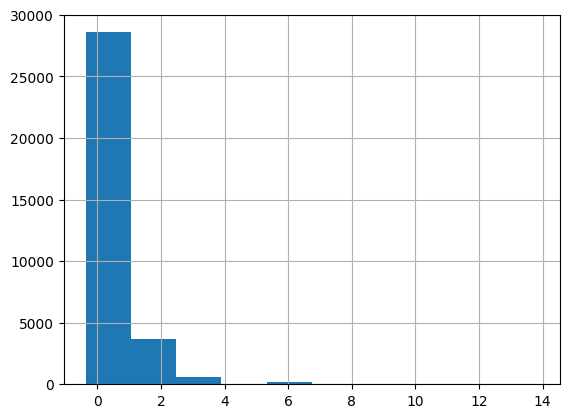

In [ ]:
df_feat.previous.hist()

In [ ]:
#----------------------------------------
# Entrenamos un modelo de clasificacion de tipo KNN para comprobar si con este metodo de vecinos podemos sacar conclusiones que mejoren las predicciones de los metodos anteriores

from sklearn.model_selection import train_test_split


# Convertir scaled_features a DataFrame
X = pd.DataFrame(scaled_features, columns=train_transformed.drop('output', axis=1).columns)
y = train_transformed['output']

[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size=0.30, random_state=1234)

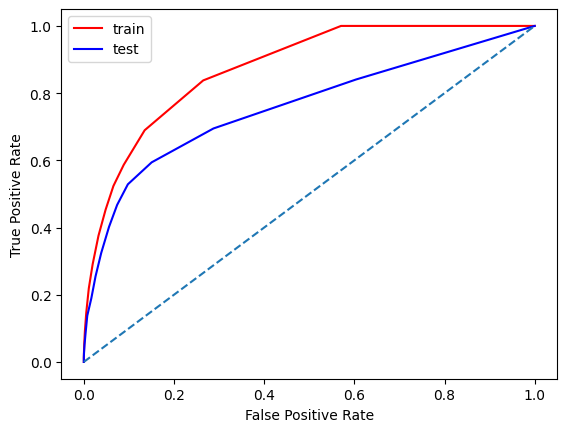

Train/Test split results:
KNeighborsClassifier accuracy is 0.894
KNeighborsClassifier auc in test is 0.759
KNeighborsClassifier auc in train is 0.875
KNeighborsClassifier Sensitivity is 0.255
KNeighborsClassifier Sensitivity 2 is 0.550
KNeighborsClassifier Specificity is 0.913
KNeighborsClassifier F1 is 0.348
[[ 187  547]
 [ 153 5735]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5888
           1       0.55      0.25      0.35       734

    accuracy                           0.89      6622
   macro avg       0.73      0.61      0.65      6622
weighted avg       0.87      0.89      0.88      6622



In [ ]:
##---------------------------------------
# Retrain with the best K found

from sklearn.neighbors import KNeighborsClassifier

new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:].index)

# Define model
knn_model1 = KNeighborsClassifier(n_neighbors=15,
                                  metric= 'hamming',   # metric= 'minkowski' 'hamming'(para variables categoricas)
                                  weights = 'uniform') # weights = 'distance' 'uniform'



# Train model
knn_model1.fit(X_train[new_columns], y_train)

# Predict
y_pred = knn_model1.predict(X_test[new_columns])

# Eval model
compute_metrics(knn_model1, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)



In [ ]:
new_columns

['euribor_3m',
 'cons_conf_index',
 'cons_price_index',
 'n_employed',
 'emp_var_rate',
 'pdays',
 'previous',
 'age',
 'campaing',
 'education_level',
 'marital_status_single',
 'marital_status_married',
 'marital_status_divorced',
 'marital_status_unknown']

Debemos fijarnos principalmente en el auc del test ya que en este tipo de modelo no es relevante el ajuste del train ya que deberia ser siempre el 100% por que estoy comprobando las distancias con todos mis valores y luego las uso para predecir no tiene que "aprender· como tal.

#### Choosing a K Value

In [ ]:
##------------------------------------
# Vamos a crear modelos de 1 a 80 vecinos y vamos a comparar los errores en una grafica

error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error rate')

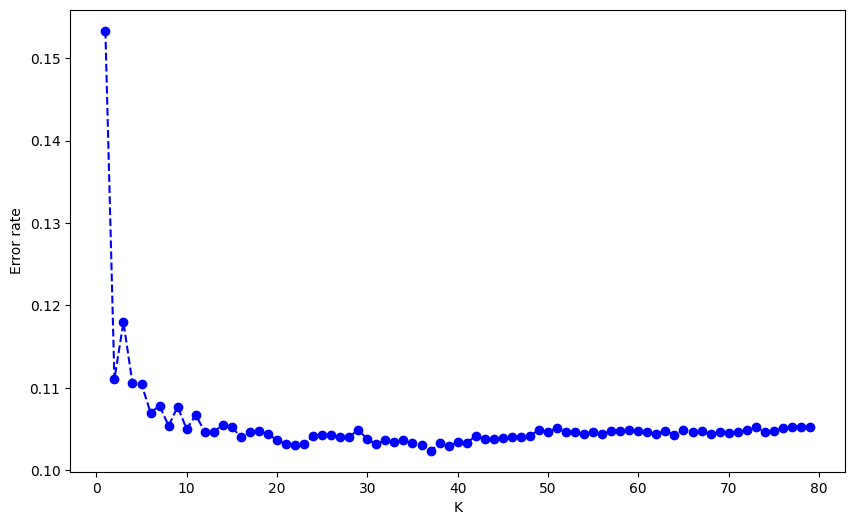

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.xlabel('K')
plt.ylabel('Error rate')

Vemos que según la grafica el número de vecinos a los que preguntar que nos interesa esta entre 10 y 20, ya que la variación no es muy grande, por lo que escogemos 14 vecinos

Text(0, 0.5, 'Error rate')

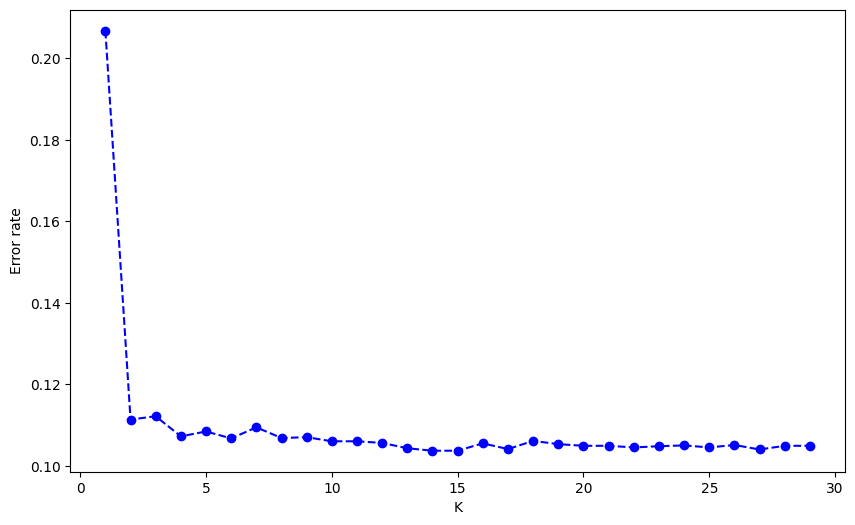

In [ ]:
##------------------------------------
# Create a for loop that trains various KNN models

error_rate = []
new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:7].index)


for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i,
                             metric= 'hamming',
                             weights = 'uniform')
  knn.fit(X_train[new_columns], y_train)
  pred_i = knn.predict(X_test[new_columns])
  error_rate.append(np.mean(pred_i != y_test))


import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(range(1,30), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.xlabel('K')
plt.ylabel('Error rate')

Text(0, 0.5, 'Error rate')

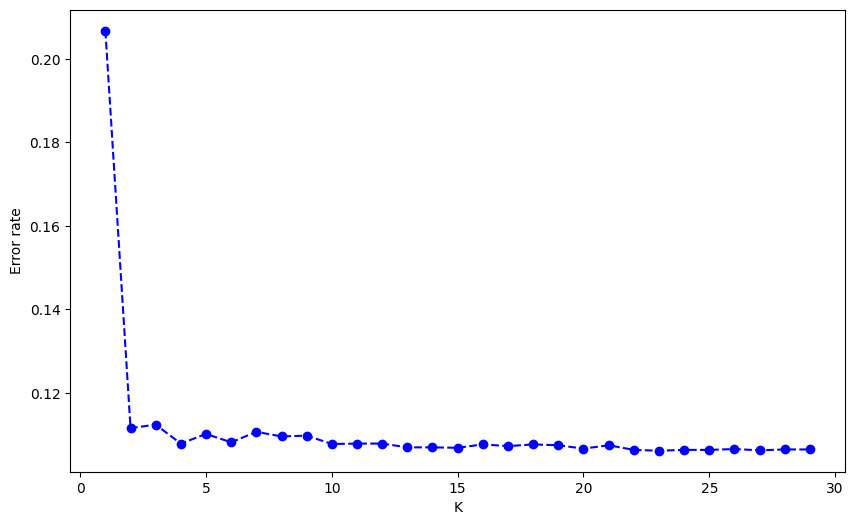

In [ ]:
##------------------------------------
# Probamos ahora con  weights='distance'

error_rate = []
new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:7].index)


for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i,
                             metric= 'hamming',
                             weights = 'distance')
  knn.fit(X_train[new_columns], y_train)
  pred_i = knn.predict(X_test[new_columns])
  error_rate.append(np.mean(pred_i != y_test))


import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(range(1,30), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.xlabel('K')
plt.ylabel('Error rate')

### 5.4 Árbol de decisión

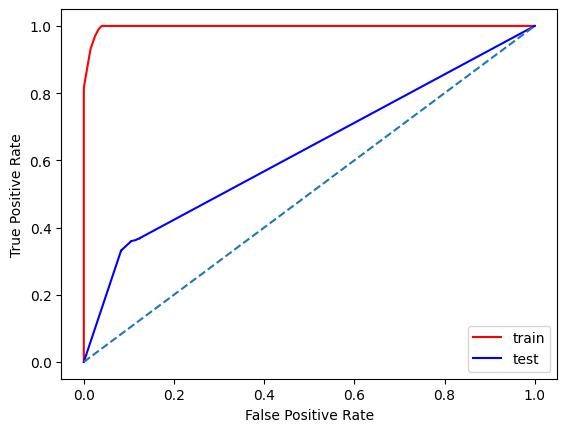

Train/Test split results:
DecisionTreeClassifier accuracy is 0.836
DecisionTreeClassifier auc in test is 0.628
DecisionTreeClassifier auc in train is 0.997
DecisionTreeClassifier Sensitivity is 0.358
DecisionTreeClassifier Sensitivity 2 is 0.300
DecisionTreeClassifier Specificity is 0.918
DecisionTreeClassifier F1 is 0.327
[[ 263  471]
 [ 614 5274]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5888
           1       0.30      0.36      0.33       734

    accuracy                           0.84      6622
   macro avg       0.61      0.63      0.62      6622
weighted avg       0.85      0.84      0.84      6622



In [ ]:
#----------------------------------------
# Entrenamos un modelo de clasificacion de tipo decision tree

new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:].index)

#### Model Decision Tree

# Define model
model_dt1 = DecisionTreeClassifier(random_state = 1234)


# Train model
model_dt1.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_dt1.predict(X_test[new_columns])

# Eval model
compute_metrics(model_dt1, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)



In [ ]:
model_dt1.get_depth()

35

In [ ]:
model_dt1.get_n_leaves()

np.int64(4783)

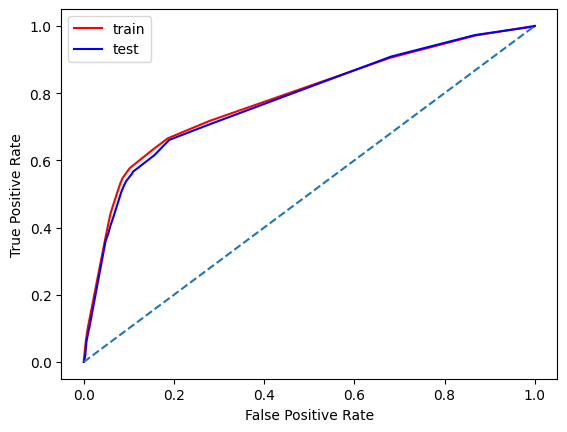

Train/Test split results:
DecisionTreeClassifier accuracy is 0.890
DecisionTreeClassifier auc in test is 0.779
DecisionTreeClassifier auc in train is 0.785
DecisionTreeClassifier Sensitivity is 0.099
DecisionTreeClassifier Sensitivity 2 is 0.510
DecisionTreeClassifier Specificity is 0.898
DecisionTreeClassifier F1 is 0.166
[[  73  661]
 [  70 5818]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5888
           1       0.51      0.10      0.17       734

    accuracy                           0.89      6622
   macro avg       0.70      0.54      0.55      6622
weighted avg       0.86      0.89      0.86      6622



In [ ]:
#Vamos la profundidiad

new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:5].index)

model_dt2 = DecisionTreeClassifier(max_depth=5, random_state = 1234)

#dejamos criterio="gini" afecta poco a las soluciones
#splitter='random'

# Train model
model_dt2.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_dt2.predict(X_test[new_columns])

# Eval model
compute_metrics(model_dt2, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)



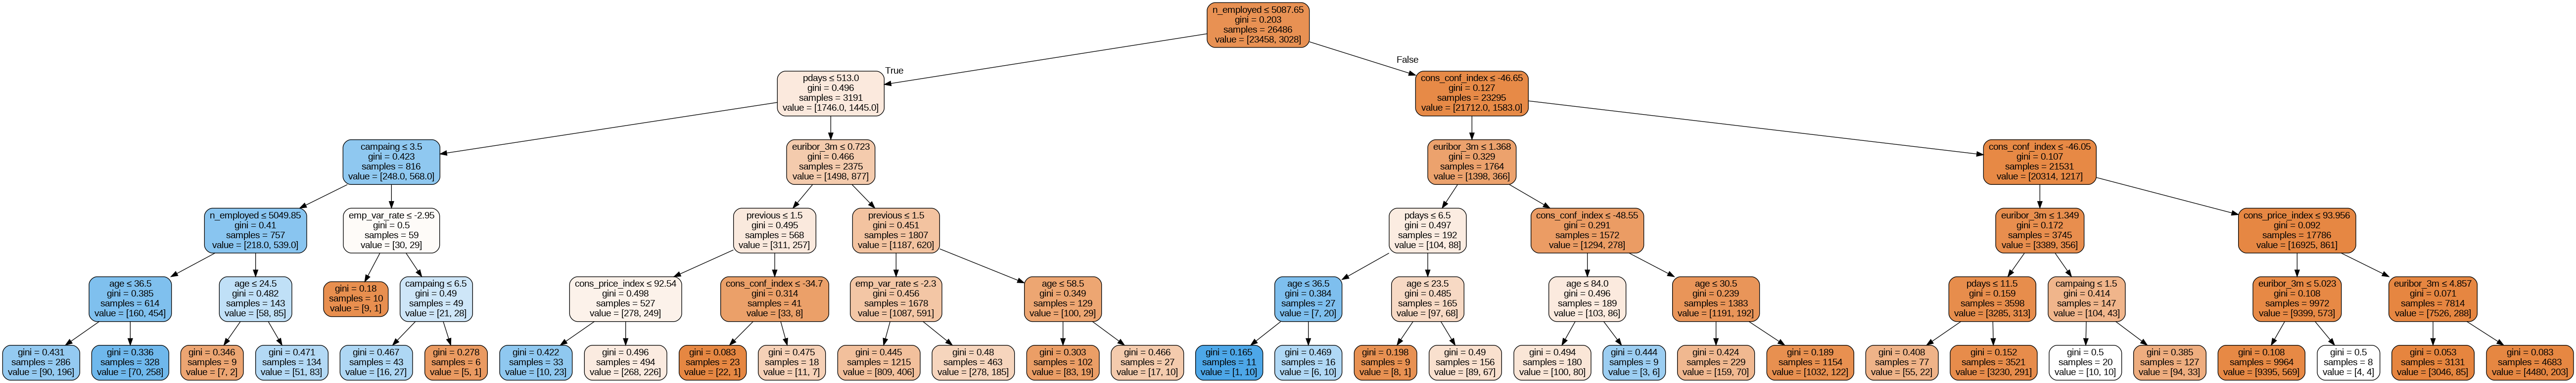

In [ ]:
# Lo pintamos

features = list(model_dt2.feature_names_in_)
features

dot_data = export_graphviz(model_dt2,
                           feature_names= features,
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = pydot.graph_from_dot_data(dot_data)
Image(graph[0].create_png())

#

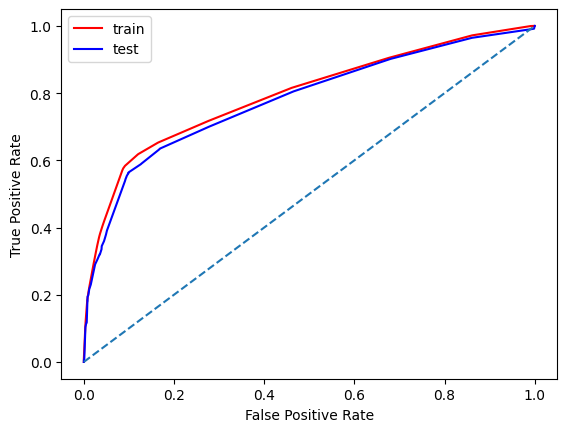

Train/Test split results:
DecisionTreeClassifier accuracy is 0.901
DecisionTreeClassifier auc in test is 0.780
DecisionTreeClassifier auc in train is 0.795
DecisionTreeClassifier Sensitivity is 0.230
DecisionTreeClassifier Sensitivity 2 is 0.650
DecisionTreeClassifier Specificity is 0.911
DecisionTreeClassifier F1 is 0.340
[[ 169  565]
 [  91 5797]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5888
           1       0.65      0.23      0.34       734

    accuracy                           0.90      6622
   macro avg       0.78      0.61      0.64      6622
weighted avg       0.88      0.90      0.88      6622



In [ ]:
from operator import ne

#Vamos a bajarle la profundidiad y ajustamos otros hiper parametros

new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:].index)

model_dt3 = DecisionTreeClassifier(max_depth=6, min_samples_split=2, min_samples_leaf=2, random_state = 1234)

#dejamos criterio="gini" afecta poco a las soluciones
#splitter='random'

# Train model
model_dt3.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_dt3.predict(X_test[new_columns])

# Eval model
compute_metrics(model_dt3, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)



In [ ]:
new_columns

['euribor_3m',
 'cons_conf_index',
 'cons_price_index',
 'n_employed',
 'emp_var_rate',
 'pdays',
 'previous',
 'age',
 'campaing',
 'education_level',
 'marital_status_single',
 'marital_status_married',
 'marital_status_divorced',
 'marital_status_unknown']

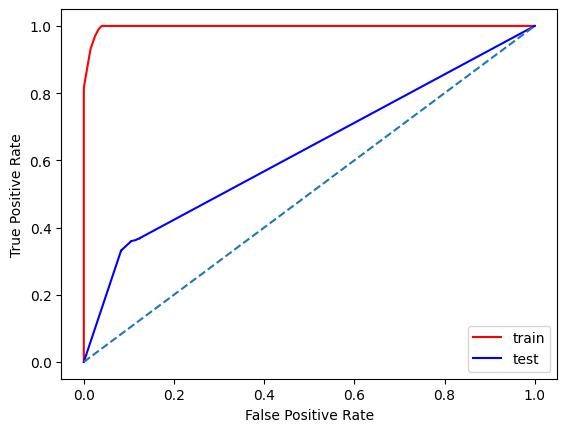

Train/Test split results:
DecisionTreeClassifier accuracy is 0.836
DecisionTreeClassifier auc in test is 0.628
DecisionTreeClassifier auc in train is 0.997
DecisionTreeClassifier Sensitivity is 0.358
DecisionTreeClassifier Sensitivity 2 is 0.300
DecisionTreeClassifier Specificity is 0.918
DecisionTreeClassifier F1 is 0.327
[[ 263  471]
 [ 614 5274]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5888
           1       0.30      0.36      0.33       734

    accuracy                           0.84      6622
   macro avg       0.61      0.63      0.62      6622
weighted avg       0.85      0.84      0.84      6622



In [ ]:
#Ajustamos hiper parametros

new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:].index)

#### Model Decision Tree

# Define model
model_dt4 = DecisionTreeClassifier(random_state = 1234)

# Train model
model_dt4.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_dt4.predict(X_test[new_columns])

# Eval model
compute_metrics(model_dt4, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)


In [ ]:
model_dt1.get_depth()

35

In [ ]:
model_dt1.get_n_leaves()

np.int64(4783)

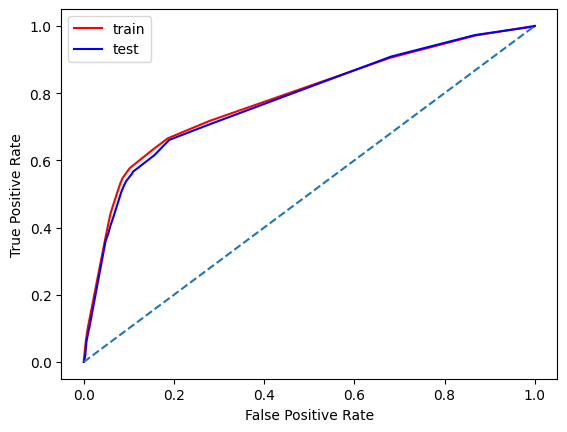

Train/Test split results:
DecisionTreeClassifier accuracy is 0.890
DecisionTreeClassifier auc in test is 0.779
DecisionTreeClassifier auc in train is 0.785
DecisionTreeClassifier Sensitivity is 0.099
DecisionTreeClassifier Sensitivity 2 is 0.510
DecisionTreeClassifier Specificity is 0.898
DecisionTreeClassifier F1 is 0.166
[[  73  661]
 [  70 5818]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5888
           1       0.51      0.10      0.17       734

    accuracy                           0.89      6622
   macro avg       0.70      0.54      0.55      6622
weighted avg       0.86      0.89      0.86      6622



In [ ]:
#Ajustamos hiper parametros, reducimos la profundidad y usamos menos variables

# Selección de variables más importantes
new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:5].index)

model_dt5 = DecisionTreeClassifier(max_depth=5, random_state = 1234)

# Train model
model_dt5.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_dt5.predict(X_test[new_columns])

# Eval model
compute_metrics(model_dt5, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)


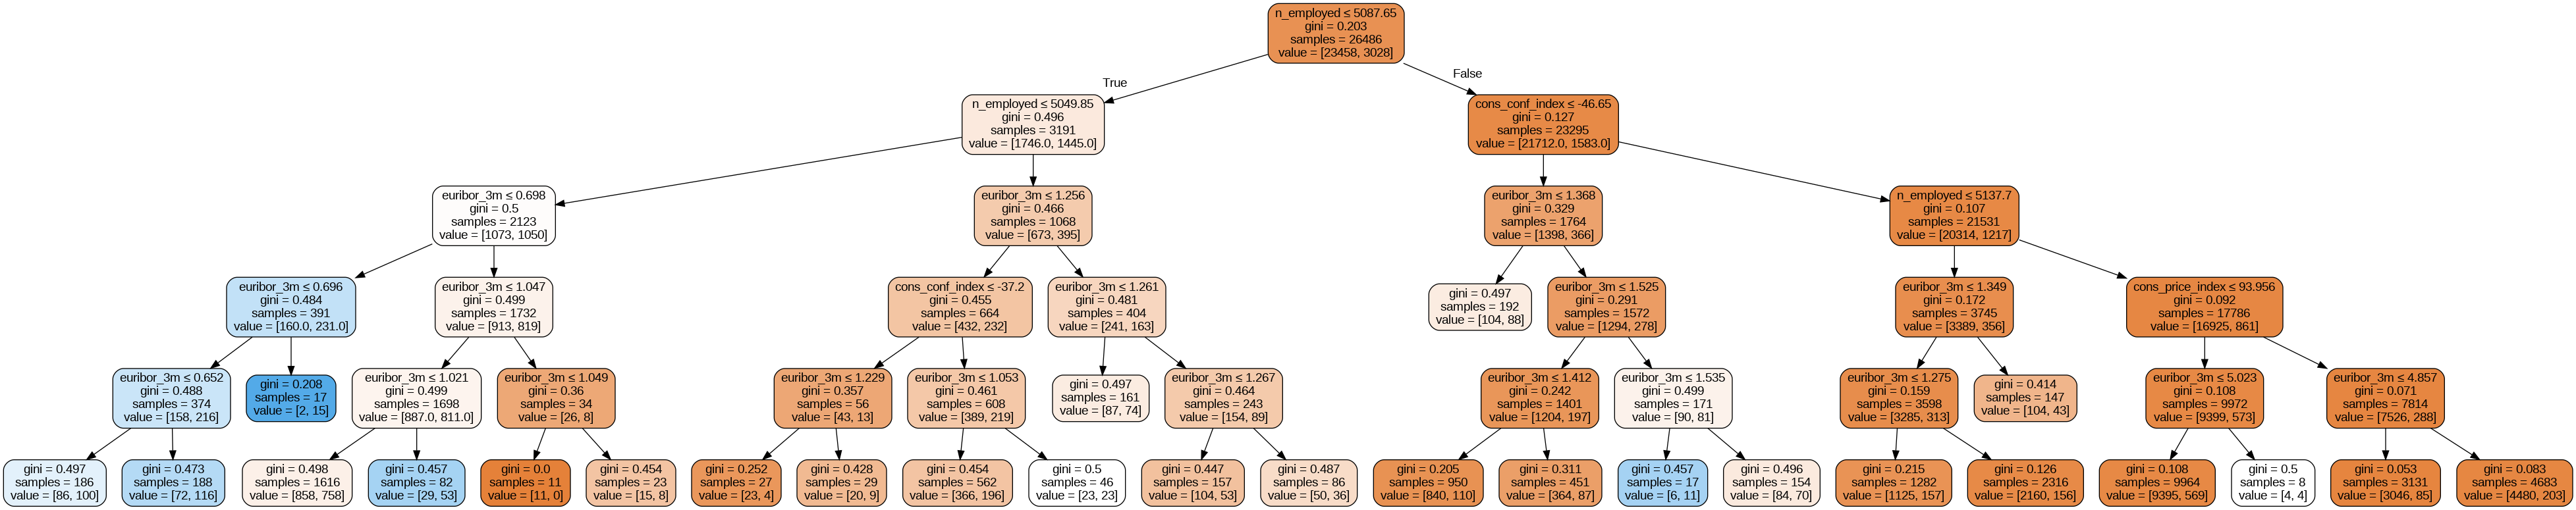

In [ ]:
# Visualización
features = list(model_dt5.feature_names_in_)
features

dot_data = export_graphviz(model_dt5,
                           feature_names=features,
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = pydot.graph_from_dot_data(dot_data)
Image(graph[0].create_png())

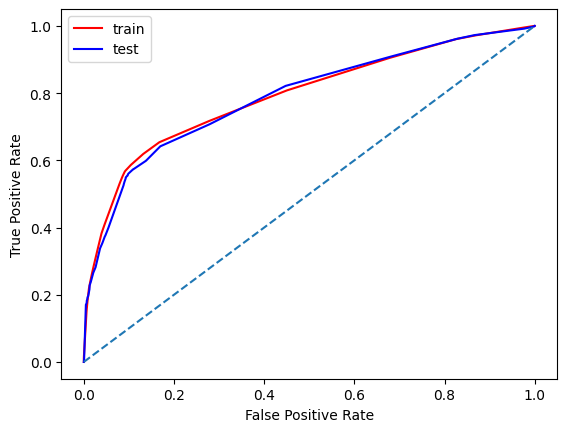

Train/Test split results:
DecisionTreeClassifier accuracy is 0.903
DecisionTreeClassifier auc in test is 0.790
DecisionTreeClassifier auc in train is 0.793
DecisionTreeClassifier Sensitivity is 0.228
DecisionTreeClassifier Sensitivity 2 is 0.687
DecisionTreeClassifier Specificity is 0.911
DecisionTreeClassifier F1 is 0.342
[[ 167  567]
 [  76 5812]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5888
           1       0.69      0.23      0.34       734

    accuracy                           0.90      6622
   macro avg       0.80      0.61      0.64      6622
weighted avg       0.89      0.90      0.88      6622



In [ ]:
#Ajustamos hiper parametros

# Selección de variables top
new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:9].index)


# Modelo con hiperparámetros
model_dt6 = DecisionTreeClassifier(max_depth=6,
                                   min_samples_split=5,
                                   min_samples_leaf=2,
                                   random_state=1234,
                                   criterion = "gini" )

# Train model
model_dt6.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_dt6.predict(X_test[new_columns])

# Eval model
compute_metrics(model_dt6, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)


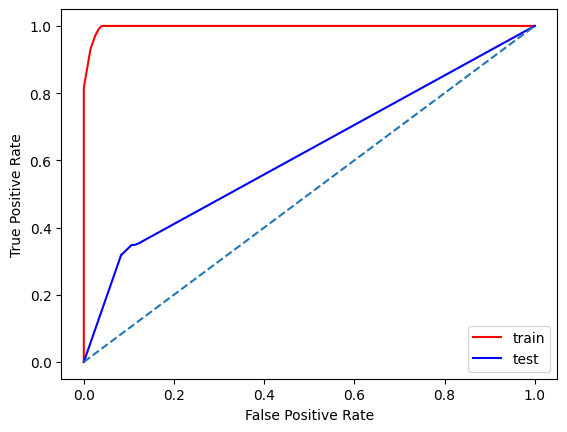

Train/Test split results:
DecisionTreeClassifier accuracy is 0.835
DecisionTreeClassifier auc in test is 0.621
DecisionTreeClassifier auc in train is 0.997
DecisionTreeClassifier Sensitivity is 0.345
DecisionTreeClassifier Sensitivity 2 is 0.293
DecisionTreeClassifier Specificity is 0.916
DecisionTreeClassifier F1 is 0.317
[[ 253  481]
 [ 610 5278]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5888
           1       0.29      0.34      0.32       734

    accuracy                           0.84      6622
   macro avg       0.60      0.62      0.61      6622
weighted avg       0.85      0.84      0.84      6622



In [ ]:
# Lanzamos otro albol de decision con todas las variables y lo dejamos crecer al maximo para forzar le sobreajuste y hacer featuring importance

new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:].index)


# Modelo con hiperparámetros
model_dt7 = DecisionTreeClassifier()

# Train model
model_dt7.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_dt7.predict(X_test[new_columns])

# Eval model
compute_metrics(model_dt7, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)


In [ ]:
#Vemos cuales son las variables mas importantes

feature_importance = pd.DataFrame(zip(model_dt7.feature_names_in_,model_dt7.feature_importances_)).sort_values(1,ascending=False)

In [ ]:
feature_importance

,0,1
3,n_employed,0.182852
0,euribor_3m,0.171884
9,age,0.124106
13,campaing,0.122270
10,age_normalized,0.119423
12,education_level,0.102751
2,cons_conf_index,0.033258
5,contacted,0.027770
15,marital_status_married,0.019180
8,previous,0.016085


### 5.5 Random Forest

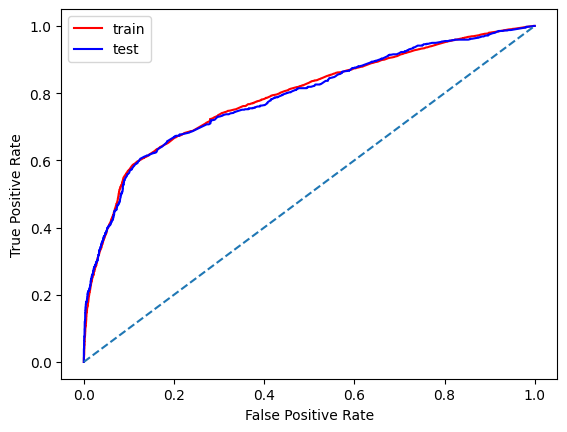

Train/Test split results:
RandomForestClassifier accuracy is 0.904
RandomForestClassifier auc in test is 0.787
RandomForestClassifier auc in train is 0.790
RandomForestClassifier Sensitivity is 0.199
RandomForestClassifier Sensitivity 2 is 0.753
RandomForestClassifier Specificity is 0.909
RandomForestClassifier F1 is 0.315
[[ 146  588]
 [  48 5840]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5888
           1       0.75      0.20      0.31       734

    accuracy                           0.90      6622
   macro avg       0.83      0.60      0.63      6622
weighted avg       0.89      0.90      0.88      6622



In [ ]:
#Tiramos el primer modelo de random forest

new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:30].index)

#### Model Random forest

# Define model
model_rf1 = RandomForestClassifier(n_estimators = 100,
                                   random_state = 1234,
                                   max_depth = 3,
                                   min_samples_leaf = 4)
# Train model
model_rf1.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_rf1.predict(X_test[new_columns])

# Eval model
compute_metrics(model_rf1, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)





In [ ]:
model_rf1.get_params()

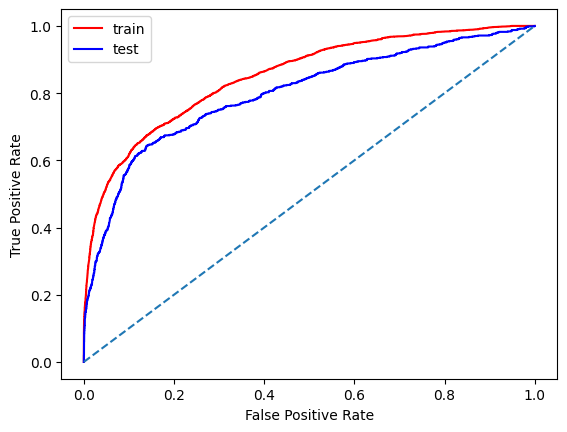

Train/Test split results:
RandomForestClassifier accuracy is 0.900
RandomForestClassifier auc in test is 0.799
RandomForestClassifier auc in train is 0.851
RandomForestClassifier Sensitivity is 0.228
RandomForestClassifier Sensitivity 2 is 0.630
RandomForestClassifier Specificity is 0.911
RandomForestClassifier F1 is 0.334
[[ 167  567]
 [  98 5790]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5888
           1       0.63      0.23      0.33       734

    accuracy                           0.90      6622
   macro avg       0.77      0.61      0.64      6622
weighted avg       0.88      0.90      0.88      6622



In [ ]:
#Probamos con GridSearchCV para buscar el mejor modelo probando con los hiperparametros mas importantes


from sklearn.model_selection import GridSearchCV

corr = train_transformed.corr()
corr = np.abs(corr['output']).sort_values(ascending=False).index
new_columns = list(corr)[1:]

#### Model Random forest

# Define model
model_rf_2 = RandomForestClassifier()

parameters = {'random_state': [1234],
              'criterion' : ('entropy','gini', 'log_loss'),
              'n_estimators': (50,100,250),
              'min_samples_leaf': (2, 4, 6),
              'max_depth': (5, 7, 10 , 20)}

model_12_gs = GridSearchCV(model_rf_2, parameters, scoring = 'roc_auc')

# Train model
model_12_gs.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_12_gs.best_estimator_.predict(X_test[new_columns])

# Eval model
compute_metrics(model_12_gs.best_estimator_, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)

In [ ]:
model_12_gs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       n_estimators=50, random_state=1234)

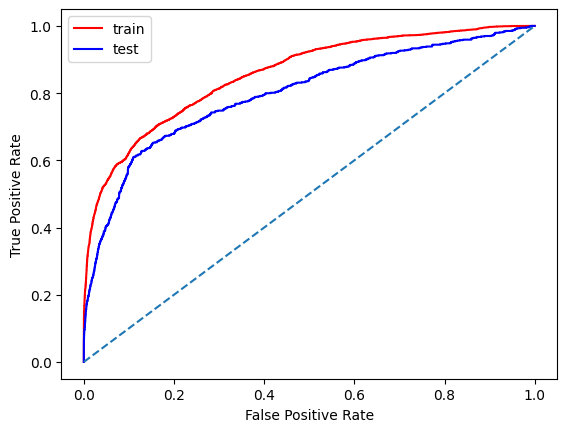

Train/Test split results:
RandomForestClassifier accuracy is 0.901
RandomForestClassifier auc in test is 0.799
RandomForestClassifier auc in train is 0.857
RandomForestClassifier Sensitivity is 0.229
RandomForestClassifier Sensitivity 2 is 0.654
RandomForestClassifier Specificity is 0.911
RandomForestClassifier F1 is 0.339
[[ 168  566]
 [  89 5799]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5888
           1       0.65      0.23      0.34       734

    accuracy                           0.90      6622
   macro avg       0.78      0.61      0.64      6622
weighted avg       0.88      0.90      0.88      6622



In [ ]:
#Tiramos el otro modelo ajustando los mejores hiper parameteros que nos ha dado el grid search


corr = train_transformed.corr()
corr = np.abs(corr['output']).sort_values(ascending=False).index
new_columns = list(corr)[1:]


#### Model Random forest

# Define model
model_rf3 = RandomForestClassifier(n_estimators = 200,
                                   criterion = "entropy",
                                   random_state = 1234,
                                   max_depth = 10,
                                   min_samples_leaf = 2)

# Train model
model_rf3.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_rf3.predict(X_test[new_columns])

# Eval model
compute_metrics(model_rf3, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)





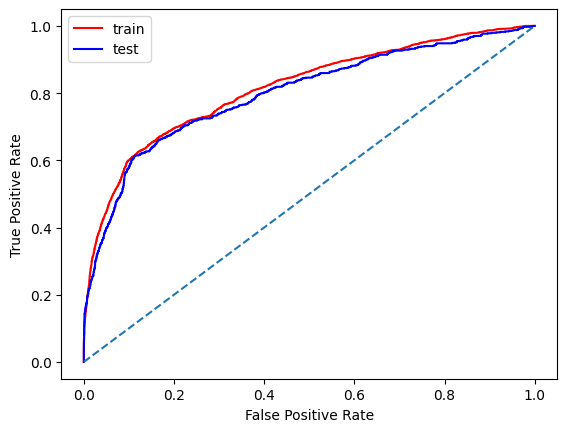

Train/Test split results:
RandomForestClassifier accuracy is 0.902
RandomForestClassifier auc in test is 0.799
RandomForestClassifier auc in train is 0.815
RandomForestClassifier Sensitivity is 0.219
RandomForestClassifier Sensitivity 2 is 0.685
RandomForestClassifier Specificity is 0.910
RandomForestClassifier F1 is 0.332
[[ 161  573]
 [  74 5814]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5888
           1       0.69      0.22      0.33       734

    accuracy                           0.90      6622
   macro avg       0.80      0.60      0.64      6622
weighted avg       0.89      0.90      0.88      6622



In [ ]:
#Tiramos el segundo modelo ajustando los mejores hiper parameteros que nos ha dado el grid search


new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:30].index)

#### Model Random forest

# Define model
model_rf4 = RandomForestClassifier(n_estimators = 50,
                                   criterion = "entropy",
                                   random_state = 1234,
                                   max_depth = 7,
                                   min_samples_leaf = 4)

# Train model
model_rf4.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_rf4.predict(X_test[new_columns])

# Eval model
compute_metrics(model_rf4, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)





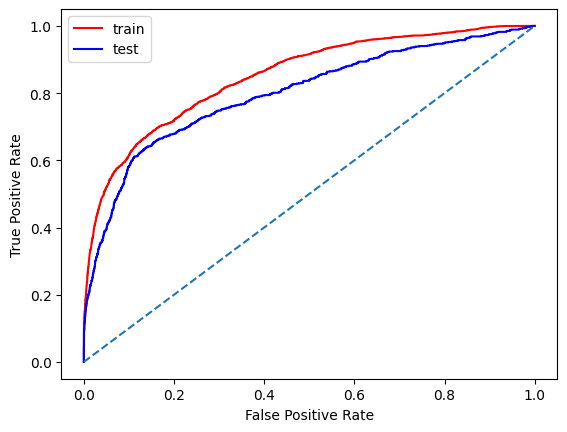

Train/Test split results:
RandomForestClassifier accuracy is 0.901
RandomForestClassifier auc in test is 0.799
RandomForestClassifier auc in train is 0.851
RandomForestClassifier Sensitivity is 0.230
RandomForestClassifier Sensitivity 2 is 0.658
RandomForestClassifier Specificity is 0.911
RandomForestClassifier F1 is 0.341
[[ 169  565]
 [  88 5800]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5888
           1       0.66      0.23      0.34       734

    accuracy                           0.90      6622
   macro avg       0.78      0.61      0.64      6622
weighted avg       0.88      0.90      0.88      6622



In [ ]:
#Probamos ahora con un RandomizedSearchCV para ver cual nos da mejores resultados

from sklearn.model_selection import RandomizedSearchCV

corr = train_transformed.corr()
corr = np.abs(corr['output']).sort_values(ascending=False).index
new_columns = list(corr)[1:]

# Define Model
model_5 =  RandomForestClassifier()

parameters = {'random_state': [1234],
              'criterion' : ('entropy','gini','log_loss'),
              'n_estimators': (400,500,600),
              'min_samples_leaf': (5, 10, 15),
              'max_depth': (5, 7, 10)}



# Train model
model_5_rs = RandomizedSearchCV(model_5, parameters, n_iter = 10, scoring = 'roc_auc')
model_5_rs.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_5_rs.best_estimator_.predict(X_test[new_columns])
y_train_pred = model_5_rs.best_estimator_.predict(X_train[new_columns])

# Eval Model
compute_metrics(model_5_rs.best_estimator_, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)


In [ ]:
model_5_rs.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=5,
                       n_estimators=400, random_state=1234)

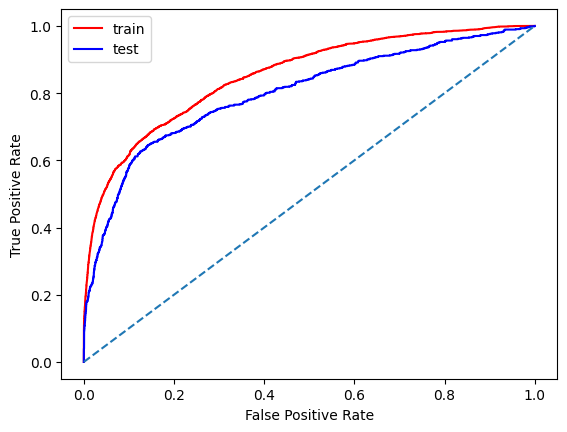

Train/Test split results:
RandomForestClassifier accuracy is 0.900
RandomForestClassifier auc in test is 0.799
RandomForestClassifier auc in train is 0.853
RandomForestClassifier Sensitivity is 0.228
RandomForestClassifier Sensitivity 2 is 0.633
RandomForestClassifier Specificity is 0.911
RandomForestClassifier F1 is 0.335
[[ 167  567]
 [  97 5791]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5888
           1       0.63      0.23      0.33       734

    accuracy                           0.90      6622
   macro avg       0.77      0.61      0.64      6622
weighted avg       0.88      0.90      0.88      6622



In [ ]:
#Probamos ahora con un RandomizedSearchCV para ver cual nos da mejores resultados

from sklearn.model_selection import RandomizedSearchCV

corr = train_transformed.corr()
corr = np.abs(corr['output']).sort_values(ascending=False).index
new_columns = list(corr)[1:]


# Define Model
model_6 =  RandomForestClassifier()

parameters = {'random_state': [1234],
              'criterion' : ('entropy','gini','log_loss'),
              'n_estimators': (40,50,70),
              'min_samples_leaf': (2, 4, 6),
              'max_depth': (10, 20, 30)}



# Train model
model_6_rs = RandomizedSearchCV(model_6, parameters, n_iter = 10, scoring = 'roc_auc')
model_6_rs.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_6_rs.best_estimator_.predict(X_test[new_columns])
y_train_pred = model_6_rs.best_estimator_.predict(X_train[new_columns])

# Eval Model
compute_metrics(model_6_rs.best_estimator_, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)


In [ ]:
model_6_rs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       n_estimators=70, random_state=1234)

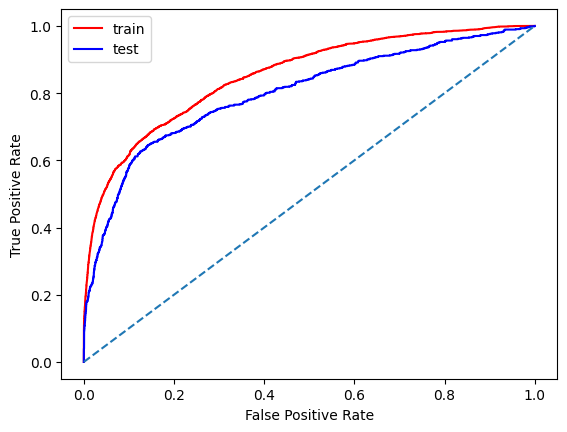

Train/Test split results:
RandomForestClassifier accuracy is 0.900
RandomForestClassifier auc in test is 0.799
RandomForestClassifier auc in train is 0.853
RandomForestClassifier Sensitivity is 0.228
RandomForestClassifier Sensitivity 2 is 0.633
RandomForestClassifier Specificity is 0.911
RandomForestClassifier F1 is 0.335
[[ 167  567]
 [  97 5791]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5888
           1       0.63      0.23      0.33       734

    accuracy                           0.90      6622
   macro avg       0.77      0.61      0.64      6622
weighted avg       0.88      0.90      0.88      6622



In [ ]:
#Tiramos el segundo modelo ajustando los mejores hiper parameteros que nos ha dado el grid search

corr = train_transformed.corr()
corr = np.abs(corr['output']).sort_values(ascending=False).index
new_columns = list(corr)[1:]

#### Model Random forest

# Define model
model_rf7 = RandomForestClassifier(n_estimators = 70,
                                   criterion = "entropy",
                                   random_state = 1234,
                                   max_depth =10,
                                   min_samples_leaf = 4)

# Train model
model_rf7.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_rf7.predict(X_test[new_columns])

# Eval model
compute_metrics(model_rf7, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)





In [ ]:
#Vemos cuales son las variables mas importantes en el modelo para aplicarles transformaciondes de FE

pd.DataFrame(zip(model_rf7.feature_names_in_,model_rf7.feature_importances_)).sort_values(1,ascending=False)

,0,1
2,euribor_3m,0.221926
0,n_employed,0.197067
3,emp_var_rate,0.116149
1,pdays,0.102263
8,cons_conf_index,0.086994
11,age,0.078126
5,cons_price_index,0.070316
6,campaing,0.041390
7,education_level,0.032361
4,previous,0.031631


Aplicamos featuring engeniering orientado a Random Forest

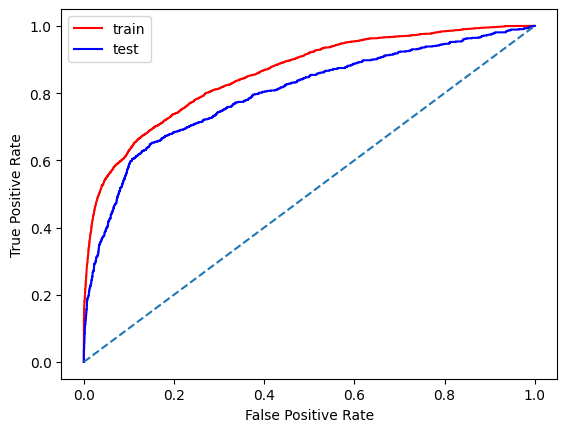

Train/Test split results:
RandomForestClassifier accuracy is 0.900
RandomForestClassifier auc in test is 0.799
RandomForestClassifier auc in train is 0.858
RandomForestClassifier Sensitivity is 0.245
RandomForestClassifier Sensitivity 2 is 0.627
RandomForestClassifier Specificity is 0.913
RandomForestClassifier F1 is 0.353
[[ 180  554]
 [ 107 5781]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5888
           1       0.63      0.25      0.35       734

    accuracy                           0.90      6622
   macro avg       0.77      0.61      0.65      6622
weighted avg       0.88      0.90      0.88      6622



In [ ]:
#Probamos el mejor rango que hemos encontrado con una nueva transformacion de variables con la transformacion de variables que hemos aplicado

from sklearn.model_selection import RandomizedSearchCV

new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:].index)

# Define Model
model_8 =  RandomForestClassifier()

parameters = {'random_state': [1234],
              'criterion' : ('entropy','gini','log_loss'),
              'n_estimators': (40,50,70),
              'min_samples_leaf': (2, 4, 6),
              'max_depth': (10, 20, 30)}


# Train model
model_8_rs = RandomizedSearchCV(model_8, parameters,random_state=42, n_iter = 10, scoring = 'roc_auc')
model_8_rs.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_8_rs.best_estimator_.predict(X_test[new_columns])
y_train_pred = model_8_rs.best_estimator_.predict(X_train[new_columns])

# Eval Model
compute_metrics(model_8_rs.best_estimator_, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)


In [ ]:
model_9_gs.best_params_


In [ ]:
model_9_gs.best_params_


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 100,
 'random_state': 1234}

In [ ]:
pd.DataFrame(zip(model_8_rs.feature_names_in_,model_rf7.feature_importances_)).sort_values(1,ascending=False)

,0,1
8,age,0.280632
9,age_normalized,0.162420
2,cons_price_index,0.088921
4,emp_var_rate,0.079906
0,euribor_3m,0.077503
6,contacted,0.072329
5,pdays,0.049916
1,cons_conf_index,0.041466
11,campaing,0.040525
7,previous,0.030794


In [ ]:
model_8_rs.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=2,
                       n_estimators=50, random_state=1234)

Finalmente probamos el mismo modelo con las transformaciones aplicadas pero esta ves con un GS

In [ ]:
model_11_rs.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       max_features='log2', min_samples_leaf=8,
                       n_estimators=300, random_state=1234)

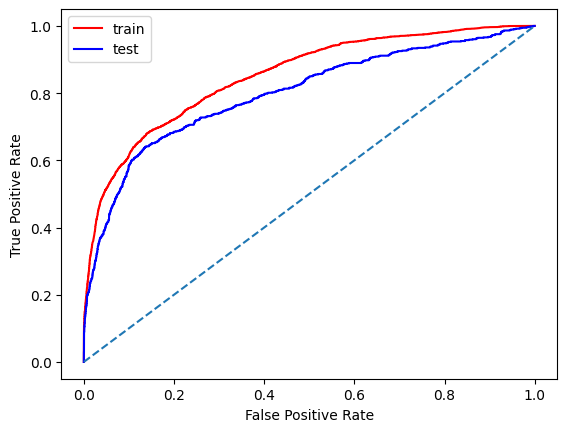

Train/Test split results:
RandomForestClassifier accuracy is 0.902
RandomForestClassifier auc in test is 0.799
RandomForestClassifier auc in train is 0.851
RandomForestClassifier Sensitivity is 0.237
RandomForestClassifier Sensitivity 2 is 0.664
RandomForestClassifier Specificity is 0.912
RandomForestClassifier F1 is 0.349
[[ 174  560]
 [  88 5800]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5888
           1       0.66      0.24      0.35       734

    accuracy                           0.90      6622
   macro avg       0.79      0.61      0.65      6622
weighted avg       0.88      0.90      0.88      6622



In [ ]:
#Probamos el mejor rango que hemos encontrado con una nueva transformacion de variables con la transformacion de variables que hemos aplicado

from sklearn.model_selection import RandomizedSearchCV

new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:].index)

# Define Model
model_10 =  RandomForestClassifier()

parameters = {'random_state': [1234],
              'criterion' : ('entropy','gini','log_loss'),
              'n_estimators': (120,200,250),
              'min_samples_leaf': (2, 4, 6),
              'max_depth': (5, 10, 30)}

# Train model
model_10_rs = RandomizedSearchCV(model_10, parameters,random_state = 42, n_iter = 10, scoring = 'roc_auc')
model_10_rs.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_10_rs.best_estimator_.predict(X_test[new_columns])
y_train_pred = model_10_rs.best_estimator_.predict(X_train[new_columns])

# Eval Model
compute_metrics(model_10_rs.best_estimator_, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

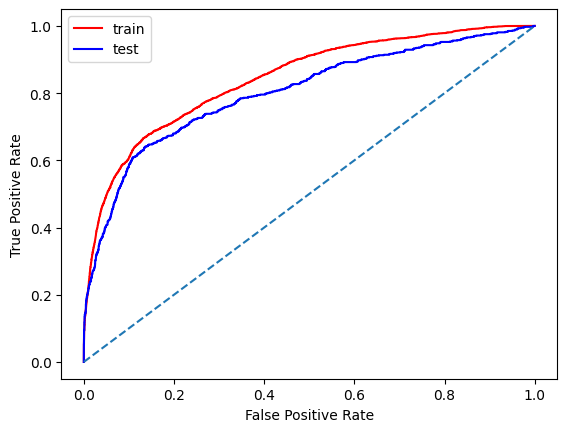

Train/Test split results:
RandomForestClassifier accuracy is 0.904
RandomForestClassifier auc in test is 0.802
RandomForestClassifier auc in train is 0.843
RandomForestClassifier Sensitivity is 0.237
RandomForestClassifier Sensitivity 2 is 0.690
RandomForestClassifier Specificity is 0.912
RandomForestClassifier F1 is 0.353
[[ 174  560]
 [  78 5810]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5888
           1       0.69      0.24      0.35       734

    accuracy                           0.90      6622
   macro avg       0.80      0.61      0.65      6622
weighted avg       0.89      0.90      0.88      6622



In [ ]:
#Probamos el mejor rango que hemos encontrado con una nueva transformacion de variables con la transformacion de variables que hemos aplicado

from sklearn.model_selection import RandomizedSearchCV

new_columns = list(corr['output'].sort_values(axis = 0, ascending = False)[1:15].index)


# Define Model
model_11 =  RandomForestClassifier(bootstrap=True)

parameters = {
    'random_state': [1234],
    'criterion': ['gini', 'entropy'],  # Eliminado 'log_loss'
    'n_estimators': [100, 200, 300, 500, 1000],  # Aumentado el rango
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12],  # Aumentado el rango
    'max_depth': [None, 5, 10, 15, 20, 25, 30],  # Aumentado el rango
    'max_features': ['auto', 'sqrt', 'log2', None, 0.5, 0.75],  # Añadido valores específicos
    'min_samples_split': [2, 5, 10, 15, 20, 25]  # Aumentado el rango
}




# Train model
model_11_rs = RandomizedSearchCV(model_11, parameters,random_state = 42, n_iter = 30, scoring = 'roc_auc', cv=5)
model_11_rs.fit(X_train[new_columns], y_train)

# Predict
y_pred = model_11_rs.best_estimator_.predict(X_test[new_columns])
y_train_pred = model_11_rs.best_estimator_.predict(X_train[new_columns])

# Eval Model
compute_metrics(model_11_rs.best_estimator_, X_train[new_columns], y_train, X_test[new_columns], y_test, trh = 0.5)

In [ ]:
model_11_rs.best_params_


{'random_state': 1234,
 'n_estimators': 50,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 7,
 'criterion': 'log_loss'}

In [ ]:
model_9_gs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=1234)

In [ ]:
model_9_gs.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=70,
                       random_state=1234)


## Kaggle Submission

In [ ]:
## Kaggle Competition
#---> https://www.kaggle.com/t/7263970cc095d70a089870a0c4842129



In [ ]:
# Descarga el dataset de test para hacer la predicción:
import pandas as pd

if Local == True:
    !gdown https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
    valid_df = pd.read_csv('test.csv')
else:
    valid_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")

Downloading...
From: https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
To: /content/test.csv
100% 954k/954k [00:00<00:00, 10.6MB/s]


In [ ]:
valid_df.head()

,id,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,21,55,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


#### Feature Engineering a valid_df
Aplicar las transformaciones a valid_df (las mismas que realizaste para train_df)

In [ ]:
valid_transformed = valid_df[['age','campaing','pdays',"marital_status",
                              'previous','emp_var_rate', 'cons_price_index',
                              'cons_conf_index',"education_level", 'euribor_3m', 'n_employed']]


#valid_transformed = valid_df[['age','campaing','pdays',
 #                             'previous','emp_var_rate', 'cons_price_index',
  #                            'cons_conf_index', 'euribor_3m', 'n_employed']]

In [ ]:
valid_transformed = data_feature(valid_df)

NameError: name 'data_feature' is not defined

In [ ]:
valid_transformed_rf = data_feature_rf(valid_df)


<ipython-input-7-3449f5176864>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_transformed['age_normalized'] = scaler.fit_transform(train_transformed[['age']])
<ipython-input-7-3449f5176864>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_transformed['education_level'] = train_transformed['education_level'].replace('unknown', moda)
<ipython-input-7-3449f5176864>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
#################################
#Función auxiliar (NO MODIFICAR):
#################################

def eval_best_model(final_model, valid_df):

    if Local == True:
      !gdown https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
      Id_aux = pd.read_csv('test.csv')
    else:
      Id_aux = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")

    columns = final_model.feature_names_in_
    X_valid = valid_df[columns]
    y_valid_pred = final_model.predict_proba(X_valid)[:,1]

    submission = pd.DataFrame({'id': Id_aux['id'],
                               'output': y_valid_pred})
    return (submission)

In [ ]:
submission = eval_best_model(model_11_rs, valid_transformed_rf)

Downloading...
From: https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
To: /content/test.csv
100% 954k/954k [00:00<00:00, 10.3MB/s]


In [ ]:
submission.to_csv('./submission.csv', index = False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed